In [1]:
import mne
import os
from os.path import abspath
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mne.time_frequency import psd_welch
from tqdm import tqdm
import itertools
from multiprocessing import Process
file_path="/home/kashraf/felix_hd/data_gen_may_2021/EEG data/Audio/"
filename=os.listdir(file_path)
path_montage="/home/kashraf/felix_hd/data_gen_may_2021/montage/"
montage=mne.channels.read_montage(path_montage+"//"+"neuroscan64ch.loc")
raw_data=[]
for file in tqdm(filename):
    files=mne.io.read_raw_cnt(file_path+"/"+file,montage=montage, preload=True,verbose=False);
    raw_data.append(files)

## Selecting channels to include
good_ch= mne.pick_channels(raw_data[0].info['ch_names'], include=[],
                        exclude=["EKG","EMG",'VEO','HEO','Trigger'])
mne.pick_info(raw_data[0].info,sel=good_ch,copy=False,verbose=False)
for f in tqdm(raw_data):
    mne.pick_info(f.info,sel=good_ch,copy=False)
    f.set_montage(montage)

/home/kashraf/anaconda3/lib/python3.7/site-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/home/kashraf/anaconda3/lib/python3.7/site-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
  0%|          | 0/11 [00:00<?, ?it/s]<ipython-input-1-a5af071fa5c2>:17: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  files=mne.io.read_raw_cnt(file_path+"/"+file,montag

 55%|█████▍    | 6/11 [00:12<00:10,  2.05s/it]<ipython-input-1-a5af071fa5c2>:17: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemus_isotrak``, or ``read_dig_captrack`` ``read_dig_hpts``, ``read_dig_captrack`` or ``read_custom_montage`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays.
  files=mne.io.read_raw_cnt(file_path+"/"+file,montage=montage, preload=True,verbose=False);
<ipython-input-1-a5af071fa5c2>:17: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: ['VEO', 'HEO', 'EKG', 'EMG', 'Trigger']. Their position has been left untouched.
  files=mne.io.read_raw_cnt(file_path+"/"+file,montage=montage, preload=True,verbose=False);
<ipython-input-1-a5af071fa5

100%|██████████| 11/11 [00:00<00:00, 279.70it/s]


In [2]:
events= mne.events_from_annotations(raw_data[6])

event_id_recall={'12': 1, '14': 2, '16': 3, '18': 4}
event_id_encoding={"22":1,"24":2,"26":3,"28":4}
# # event_id_answer={""}
# event_id_answer={"51":9,"52":10}
# events


Used Annotations descriptions: ['22', '24', '255', '26', '28', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '51', '52', '62', '64', '66', '68']


In [3]:
info=raw_data[1].info
info

<Info | 18 non-empty fields
    bads : list | 0 items
    ch_names : list | FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, ...
    chs : list | 64 items (EEG: 64)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : Digitization | 64 items (64 EEG)
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 125.0 Hz
    meas_date : NoneType | unspecified
    nchan : int | 64
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 250.0 Hz
    subject_info : dict | 5 items
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneTy

In [4]:
import multiprocessing
from tqdm import tqdm
data=dict()
for i in range(len(raw_data)):
    data[i+1]={
    2:mne.Epochs(raw_data[i], events[0], event_id=event_id_encoding["22"]).get_data(),
    4:mne.Epochs(raw_data[i], events[0], event_id=event_id_encoding["24"]).get_data(),
    6:mne.Epochs(raw_data[i], events[0], event_id=event_id_encoding["26"]).get_data(),
    8:mne.Epochs(raw_data[i], events[0], event_id=event_id_encoding["28"]).get_data(),
    }

45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
1509 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1509 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 mat

Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
1509 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1509 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped


### Single trial data for each cognitive load

In [5]:
cl2_data=np.concatenate([data[sub][2] for sub in data])
cl4_data=np.concatenate([data[sub][4] for sub in data])
cl6_data=np.concatenate([data[sub][6] for sub in data])
cl8_data=np.concatenate([data[sub][8] for sub in data])


#### Single trial power spectral density

In [6]:
# def psd_gen(dataset):
#     psds=[]
#     for i in tqdm(range(dataset.shape[0])):
#         trial_data=np.reshape(dataset[i],(1,64,176))
#         trial_data=mne.EpochsArray(trial_data,info=raw_data[0].info,verbose=0)
#         psd,freq= mne.time_frequency.psd_welch(trial_data,n_fft=176,verbose=0)
#         psd= np.average(psd,axis=2).flatten()
#         psds.append(psd)
#     return np.array(psds)
# cl2_psd=psd_gen(cl2_data)
# cl4_psd=psd_gen(cl4_data)
# cl6_psd=psd_gen(cl6_data)
# cl8_psd=psd_gen(cl8_data)

#### PCA and choice of components

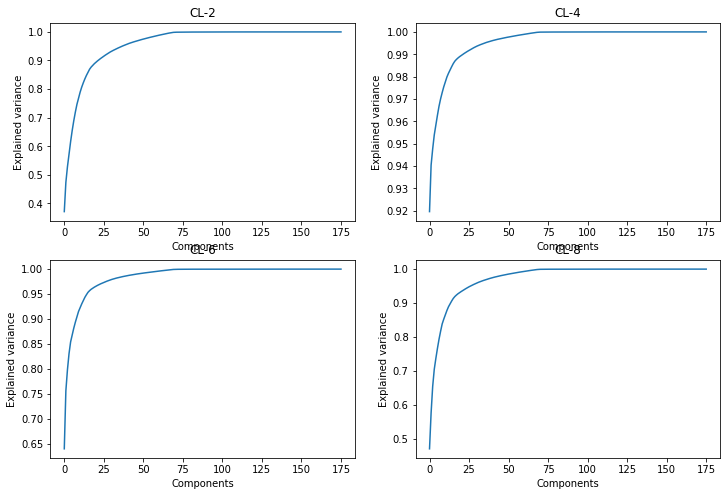

In [7]:
from sklearn.decomposition import PCA
pca=PCA()
explained_var2=pca.fit(np.concatenate(cl2_data)).explained_variance_
explained_var4=pca.fit(np.concatenate(cl4_data)).explained_variance_
explained_var6=pca.fit(np.concatenate(cl6_data)).explained_variance_
explained_var8=pca.fit(np.concatenate(cl8_data)).explained_variance_
titles=["CL-2","CL-4","CL-6","CL-8"]
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(12,8))
for ax, var,title in zip(axes.flatten(),[explained_var2,explained_var4,explained_var6,explained_var8],titles):
    ax.plot(np.cumsum(var/sum(var)))
    ax.set_title(title)
    ax.set_ylabel("Explained variance")
    ax.set_xlabel("Components")

In [8]:
cl2_data.flatten().shape

(5575680,)

### Bootstrap sampling 

In [9]:
from tqdm import tqdm

n_trials= 20# Number of trials to be selected and be averaged out to give one ERP
n_erp= 1000 # Nmber of ERPS required per subject per CL level. So for cL2 we have 1000*11 Erp

def bootstrap(event,trials, n_trials,n_erps):
    erps=[]
    for i in range(n_erps):
        t=np.random.choice(trials,n_trials)
        erp = np.average(event[t],axis=0)
        erps.append(erp)
    return erps
for i in tqdm(range(len(data))):
    data[i+1]["erp2"]=bootstrap(data[i+1][2], data[i+1][2].shape[0],n_trials,n_erp)
    data[i+1]["erp4"]=bootstrap(data[i+1][4], data[i+1][4].shape[0],n_trials,n_erp)
    data[i+1]["erp6"]=bootstrap(data[i+1][6], data[i+1][6].shape[0],n_trials,n_erp)
    data[i+1]["erp8"]=bootstrap(data[i+1][8], data[i+1][8].shape[0],n_trials,n_erp)

## Transform our data into epoch array
# from tqdm import tqdm
# def bootstrap_process(start):


100%|██████████| 11/11 [00:14<00:00,  1.37s/it]


In [10]:
# for sub in tqdm(data):
#     for i in range(1000):
#         data[sub]["erp2"][i]=np.reshape(data[sub]["erp2"][i],(1,64,176))
#         data[sub]["erp2"][i]=mne.EpochsArray(data[sub]["erp2"][i],info=raw_data[0].info,verbose=0)

#         data[sub]["erp4"][i]=np.reshape(data[sub]["erp4"][i],(1,64,176))
#         data[sub]["erp4"][i]=mne.EpochsArray(data[sub]["erp4"][i],info=raw_data[0].info,verbose=0)

#         data[sub]["erp6"][i]=np.reshape(data[sub]["erp6"][i],(1,64,176))
#         data[sub]["erp6"][i]=mne.EpochsArray(data[sub]["erp6"][i],info=raw_data[0].info,verbose=0)

#         data[sub]["erp8"][i]=np.reshape(data[sub]["erp8"][i],(1,64,176))
#         data[sub]["erp8"][i]=mne.EpochsArray(data[sub]["erp8"][i],info=raw_data[0].info,verbose=0)

In [11]:
# def psd_bootstrap(erp_level):
#     psds=[]
#     for sub in data:
#         for i in range(1000):
#             erp_data=data[sub][erp_level][i]
#             psd,freq= mne.time_frequency.psd_welch(erp_data,n_fft=176,verbose=0)
#             psd= np.average(psd,axis=2).flatten()
#             psds.append(psd)
#     return np.array(psds)
# p_density_cl2=psd_bootstrap("erp2")
# p_density_cl4=psd_bootstrap("erp4")
# p_density_cl6=psd_bootstrap("erp6")
# p_density_cl8=psd_bootstrap("erp8")
            

In [12]:
# recons=pca_projection_reconstruction(cl8_psd,p_density_cl8,1)
# error= np.linalg.norm(recons-p_density_cl8,axis=1)
# plt.hist(error)
# plt.show()


In [13]:

def pca_projection_reconstruction(trial_data,erp_data,n_components):
    pca=PCA(n_components=n_components)
    pca.fit(trial_data)
    eigen_space=pca.components_
    reconstructed=[]
    for erp in erp_data:     
    # Project Erp into these space
        projected_erp=pca.transform(erp)
        recons=np.dot(projected_erp,eigen_space)
        reconstructed.append(recons)
    return np.array(reconstructed)
    

In [14]:
# original_data=np.concatenate(cl4_data)
# erps=np.array(data[1]['erp2'])
# data_recon=pca_projection_reconstruction(original_data,erps,10)

In [16]:
# error=erps-np.array(data_recon)
# recon_error=[sum(np.linalg.norm(err,axis=1)) for err in error] 

In [21]:
def generate_rec_error(single_data,erp):
    # generate reconstruction erros for boot strapp sample
    reconstructed=pca_projection_reconstruction(trial_data=single_data,erp_data=erp,n_components=75)
    error=erp-np.array(reconstructed)
    recon_error=[sum(np.linalg.norm(err,axis=1)) for err in error]
    return recon_error
    

In [19]:
def ci_data_selection(errors):
    sorted_data=np.sort(errors)
    l_limit= np.percentile(sorted_data,25)
    u_limit=np.percentile(sorted_data,75)
    id_selected=[]
    for index , err in enumerate(errors):
        if l_limit<=err and err<=u_limit:
            id_selected.append(index)
#         else:
#             print(err)
    return id_selected
    

In [22]:
for sub in tqdm(data):
    rec_error2=generate_rec_error(np.concatenate(data[sub][2]),data[sub]["erp2"])
    index2=ci_data_selection(rec_error2)
    data[sub]["erp2_new"]=np.array(data[sub]["erp2"])[index2]
    
    rec_error4=generate_rec_error(np.concatenate(data[sub][4]),data[sub]["erp4"])
    index4=ci_data_selection(rec_error4)
    data[sub]["erp4_new"]=np.array(data[sub]["erp4"])[index4]
    
    rec_error6=generate_rec_error(np.concatenate(data[sub][6]),data[sub]["erp6"])
    index6=ci_data_selection(rec_error6)
    data[sub]["erp6_new"]=np.array(data[sub]["erp6"])[index6]
    
    rec_error8=generate_rec_error(np.concatenate(data[sub][8]),data[sub]["erp8"])
    index8=ci_data_selection(rec_error8)
    data[sub]["erp8_new"]=np.array(data[sub]["erp8"])[index8]

100%|██████████| 11/11 [00:44<00:00,  3.41s/it]


In [ ]:
from data_gen_may_2021 import topo_generator
from 


In [ ]:
type(data)

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(recon_error[1000:2000])
plt.xlabel("Reconstruction error"),plt.ylabel("Frequency")
plt.show()

In [ ]:
info